In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
liver=pd.read_csv("indian_liver_patient_dataset.csv")


In [5]:
liver.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
liver.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
alkphos,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
sgpt,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
sgot,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
TP,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
ALB,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
A_G,583.0,-685.165780,8261.856000,-100000.0,0.7,0.92,1.1,2.8
class,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [7]:
liver.isnull().sum()

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        0
class      0
dtype: int64

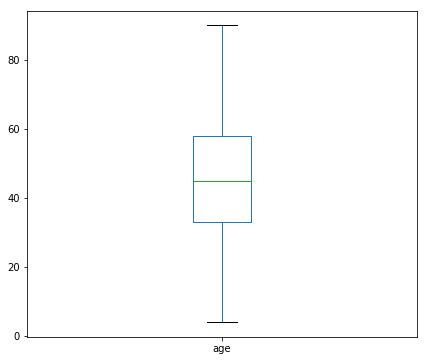

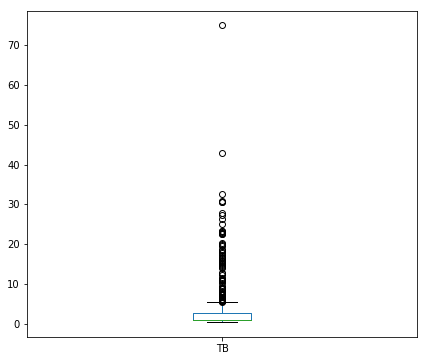

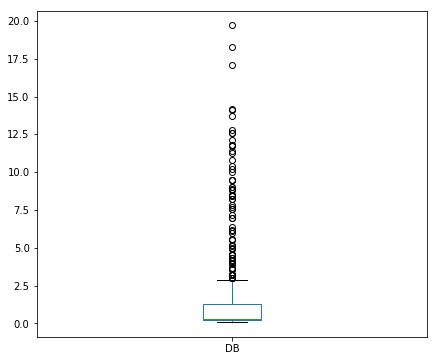

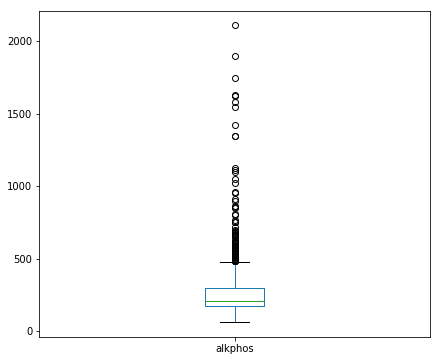

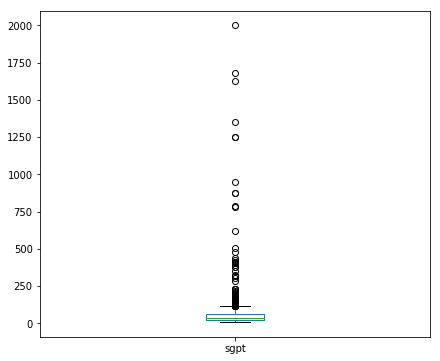

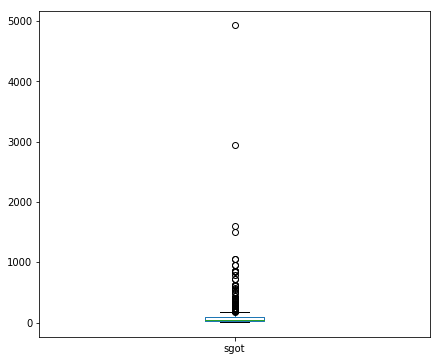

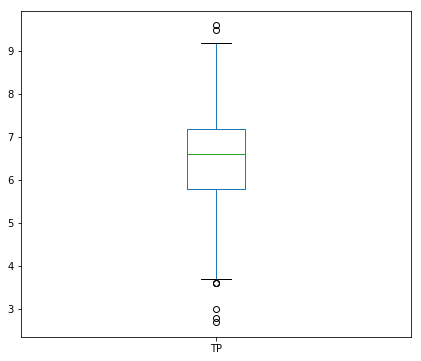

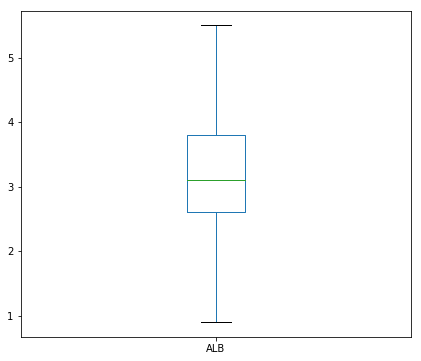

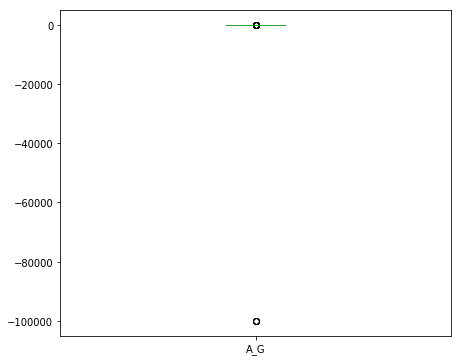

In [8]:
for i in liver.columns[0:len(liver.columns.values)-1]:
    if liver[i].dtype in ['int64','float64']:
        plt.figure()
        liver[i].plot(kind='box',figsize=(7,6))
        
        

In [9]:
q1=liver.quantile(0.25)
q2=liver.quantile(0.50)
q3=liver.quantile(0.75)
iqr=q3-q1
iqr
r1=q3+iqr*1.5
r2=q1-iqr*1.5

In [10]:
r1

age         95.50
TB           5.30
DB           2.95
alkphos    481.75
sgpt       116.75
sgot       180.00
TP           9.30
ALB          5.60
A_G          1.70
class        3.50
dtype: float64

In [11]:
r2
liver.var()

age        2.621107e+02
TB         3.855816e+01
DB         7.887659e+00
alkphos    5.901887e+04
sgpt       3.335019e+04
sgot       8.347392e+04
TP         1.178205e+00
ALB        6.328502e-01
A_G        6.825826e+07
class      2.047473e-01
dtype: float64

In [12]:
features=liver.columns.drop(["class"])

In [13]:
target=["class"]

In [14]:
l_encoded=pd.get_dummies(liver[features])
l_encoded.columns

Index(['age', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB', 'A_G',
       'gender_Female', 'gender_Male'],
      dtype='object')

In [15]:
liver["A_G"].replace(to_replace=-100000,value=liver['A_G'].median())
round(liver.var(),2)

age             262.11
TB               38.56
DB                7.89
alkphos       59018.87
sgpt          33350.19
sgot          83473.92
TP                1.18
ALB               0.63
A_G        68258264.57
class             0.20
dtype: float64

In [16]:
liver.corr()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


In [17]:
l_encoded["class"]=liver["class"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
l_train,l_test=train_test_split(l_encoded,test_size=0.15)

In [20]:
l_train.shape,l_test.shape

((495, 12), (88, 12))

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()

In [23]:
features=["age","alkphos","sgpt","A_G","TP"]

In [24]:
target=["class"]

In [25]:
model.fit(l_train[features],l_train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
train_accuracy=model.score(l_train[features],l_train[target])
test_accuracy=model.score(l_test[features],l_test[target])
train_accuracy,test_accuracy

(0.7333333333333333, 0.6818181818181818)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
train_p=model.predict(l_train[features])
test_p=model.predict(l_test[features])
train_m=confusion_matrix(l_train[target],train_p)
test_m=confusion_matrix(l_test[target],test_p)

In [29]:
pd.DataFrame(train_m,columns=model.classes_,index=model.classes_)

,1,2
1,336,18
2,114,27


In [30]:
pd.DataFrame(test_m,columns=model.classes_,index=model.classes_)

,1,2
1,58,4
2,24,2


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model1 = DecisionTreeClassifier()

In [33]:
features = l_train.columns.drop("class")
target = ["class"]
model1.fit(l_train[features],l_train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
train_accuracy = model1.score(l_train[features],l_train[target])
test_accuracy = model1.score(l_test[features],l_test[target])
print(train_accuracy,test_accuracy)

1.0 0.625


In [35]:
k=pd.read_csv("indian_liver_patient_dataset.csv")

In [36]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age        583 non-null int64
gender     583 non-null object
TB         583 non-null float64
DB         583 non-null float64
alkphos    583 non-null int64
sgpt       583 non-null int64
sgot       583 non-null int64
TP         583 non-null float64
ALB        583 non-null float64
A_G        583 non-null float64
class      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [37]:
k.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
s_values=scaler.fit_transform(k[["age","TB","DB","alkphos","sgpt","sgot","TP","ALB","A_G"]])
k["age"]=s_values[:,0]
k["TB"]=s_values[:,1]
k["DB"]=s_values[:,2]
k["alkphos"]=s_values[:,3]
k["sgpt"]=s_values[:,4]
k["sgot"]=s_values[:,5]
k["TP"]=s_values[:,6]
k["ALB"]=s_values[:,7]
k["A_G"]=s_values[:,8]
k.var()

age        0.035440
TB         0.006928
DB         0.020532
alkphos    0.014085
sgpt       0.008422
sgot       0.003450
TP         0.024747
ALB        0.029908
A_G        0.006825
class      0.204747
dtype: float64

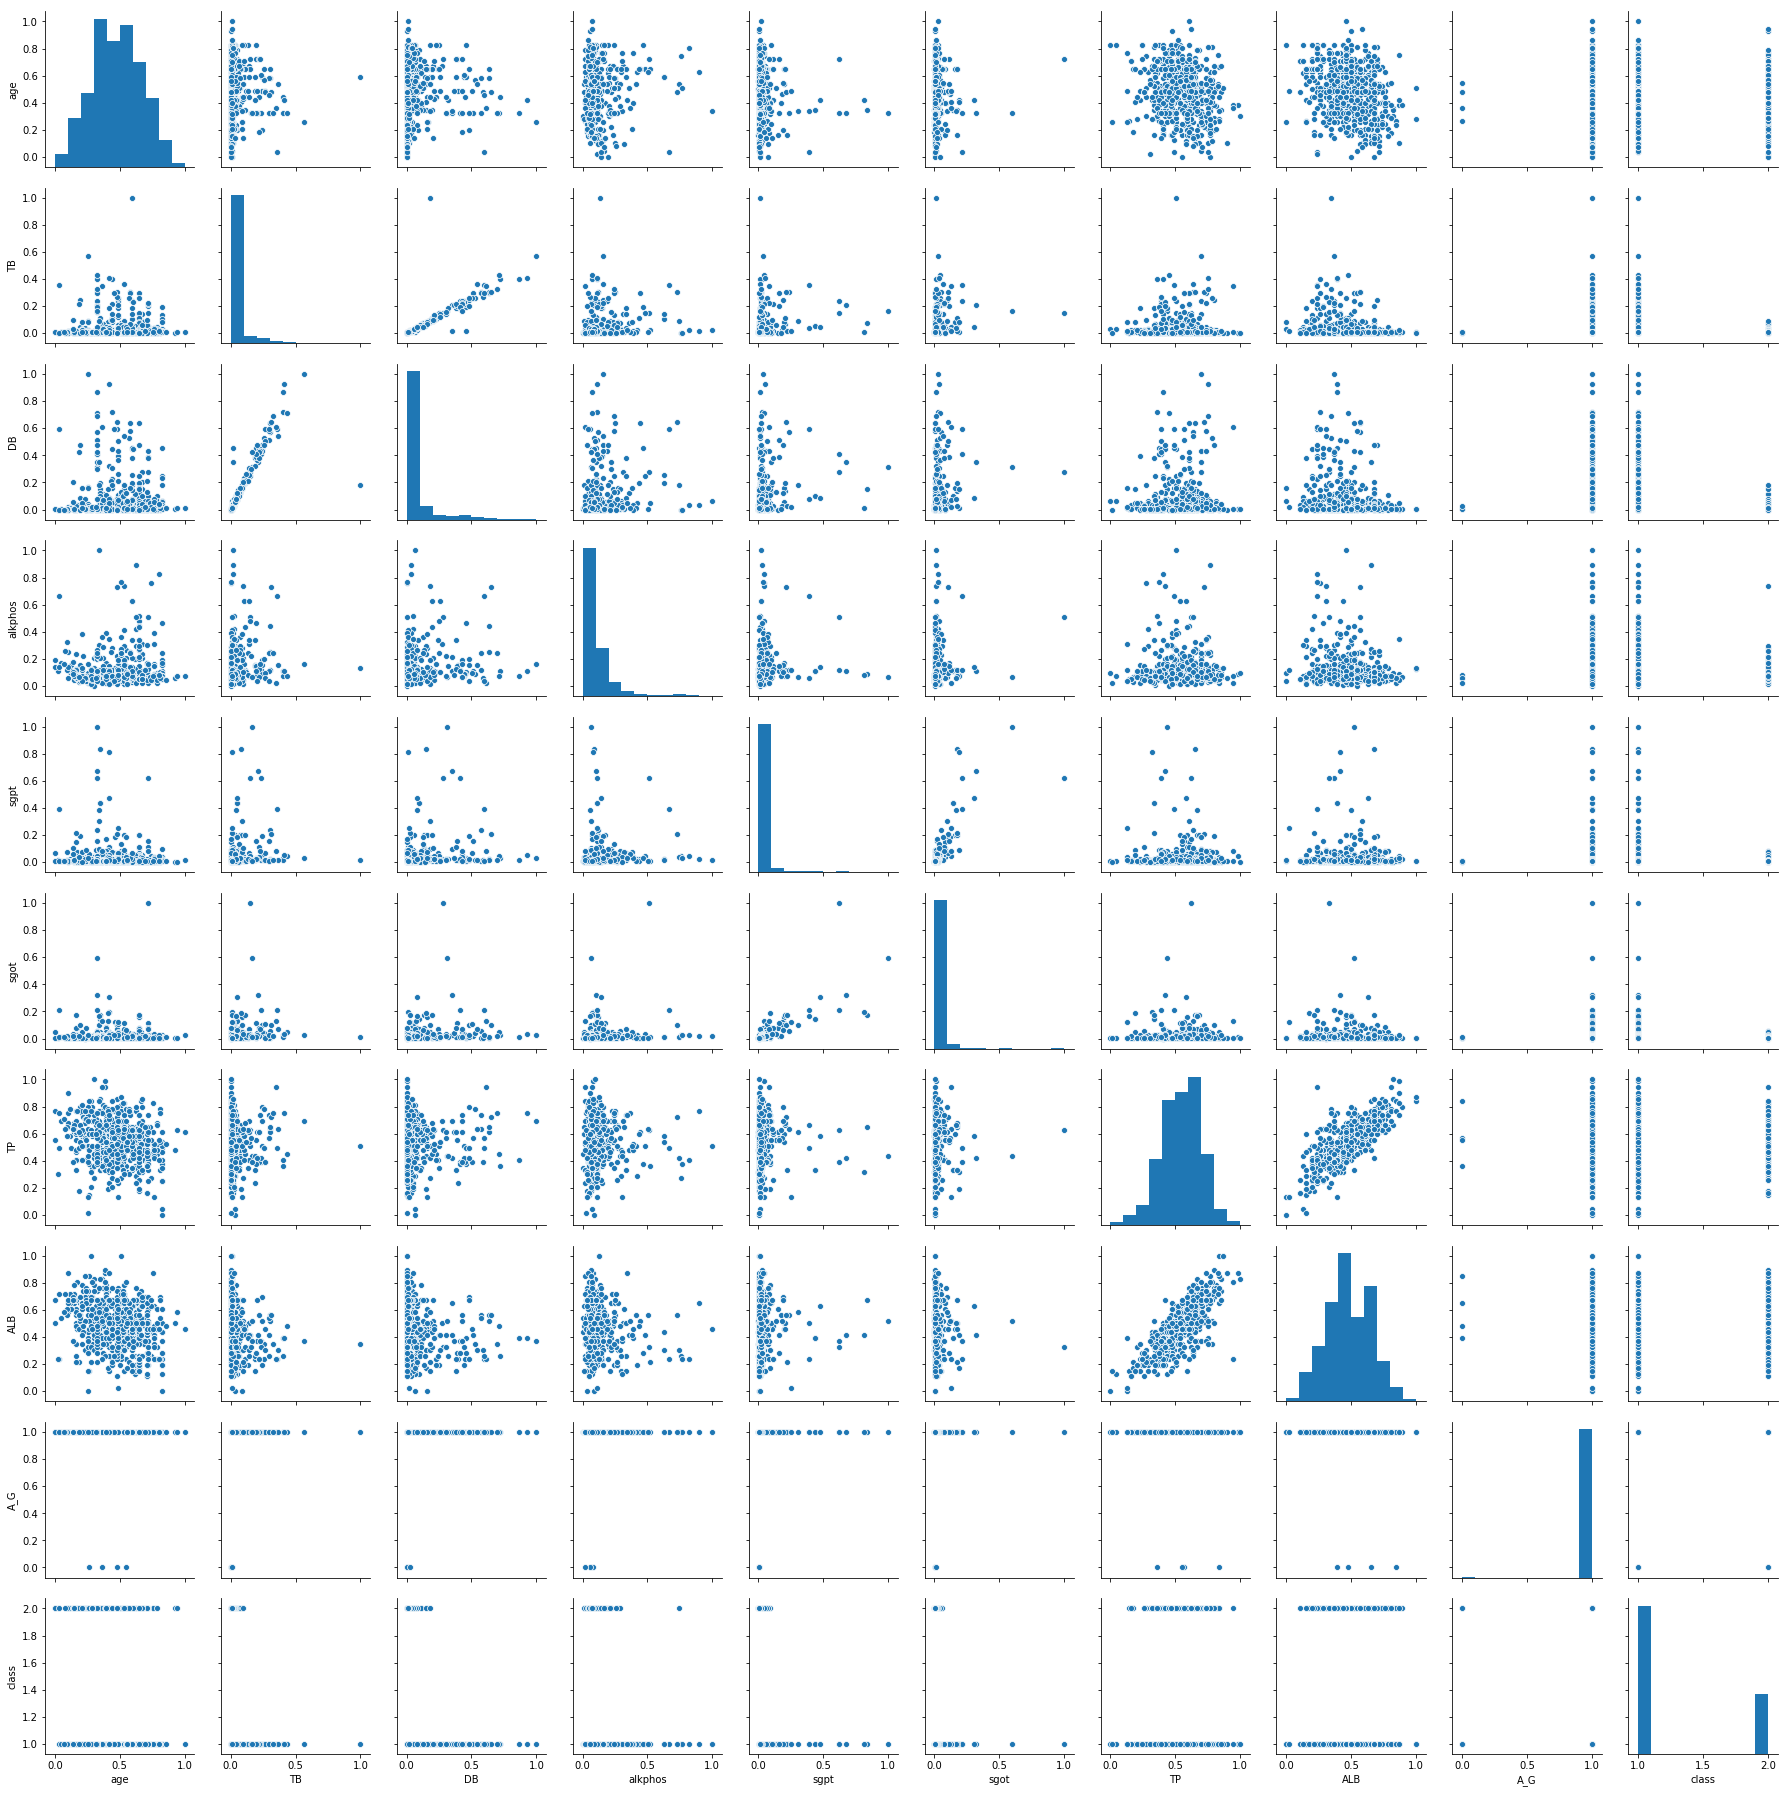

In [41]:
sns.pairplot(k)

In [42]:
k2=k.drop(columns=["gender","class"])

In [43]:
from sklearn.model_selection import train_test_split
k_train,k_test=train_test_split(k,test_size=0.05,random_state=100)

In [44]:
k_train.shape,k_test.shape

((553, 11), (30, 11))

In [45]:
k.var()

age        0.035440
TB         0.006928
DB         0.020532
alkphos    0.014085
sgpt       0.008422
sgot       0.003450
TP         0.024747
ALB        0.029908
A_G        0.006825
class      0.204747
dtype: float64

In [46]:
k.corr()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
model=KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [49]:
features=["age","alkphos","ALB","DB","TP"]

In [50]:
target=["class"]
model.fit(k_train[features],k_train[target])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
train_a=model.score(k_train[features],k_train[target])
test_a=model.score(k_test[features],k_test[target])
train_a,test_a

(0.8372513562386981, 0.7666666666666667)

In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
features=["age","alkphos","ALB","DB","TP","TB","sgpt","sgot","A_G"]
X=pca.fit_transform(k[features])
X.shape
pca.explained_variance_ratio_

array([0.36911344, 0.20969229, 0.18183145, 0.08355054, 0.0648211 ,
       0.04528961])

In [61]:

pc1=PCA(0.95)
pc1.fit_transform(k[features]).shape

(583, 6)

In [68]:
q=pd.DataFrame(X,columns=['a','b','c','d','e','f'])
q['target']=k['class']
q.head()

,a,b,c,d,e,f,target
0,0.038463,-0.252632,0.045426,-0.036159,0.003634,-0.009788,1
1,0.061272,-0.045114,0.364587,0.096940,-0.077345,0.002560,1
2,0.060984,-0.095626,0.247641,0.029651,-0.038589,0.001280,1
3,-0.010549,-0.186825,0.026153,-0.039363,-0.002639,-0.009520,1
4,0.185826,-0.224544,0.155330,-0.069724,-0.033585,-0.020708,1


In [69]:
from sklearn.model_selection import train_test_split
b_train,b_test=train_test_split(q,test_size=0.15,random_state=100)

In [70]:
model1=KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [76]:
model1.fit(b_train[b_train.columns.drop('target')],b_train['target'])
print(model1.score(b_train[b_train.columns.drop('target')],b_train['target']))
print(model1.score(b_test[b_test.columns.drop('target')],b_test['targe t']))

0.8222222222222222
0.5795454545454546


SVM

In [52]:
s=pd.read_csv("indian_liver_patient_dataset.csv")

In [53]:
y_n=lambda x:"y" if x==1 else "n"
s["y_n"]=s["class"].apply(y_n)


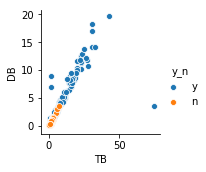

In [54]:
sns.pairplot(s,x_vars="TB",y_vars="DB",hue="y_n")

In [55]:
from sklearn.svm import SVC

In [56]:
from sklearn.model_selection import train_test_split
s_train,s_test=train_test_split(s,test_size=0.15,random_state=100)
features=["age","alkphos","ALB","DB"]
target=["class"]
model=SVC(kernel="rbf")
model.fit(s_train[features],s_train[target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
train_s=model.score(s_train[features],s_train[target])
test_s=model.score(s_test[features],s_test[target])
train_s,test_s

(0.9595959595959596, 0.7727272727272727)